<a href="https://colab.research.google.com/github/Rayralima/Desafio-Machine-Learning/blob/main/Desafio_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Justificativa

“Escolhi o dataset Pima Indians Diabetes Database por ser uma base clássica para classificação binária no diagnóstico de diabetes. Ele possui dados reais de exames médicos de mulheres Pima com 8 atributos numéricos. É amplamente utilizado em estudos de machine learning, o que permite validação dos resultados. Além disso, atende ao requisito de ter no máximo 10 variáveis.”

## Fonte de Dados:

Link: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/pima-indians-diabetes-database


## Código Base

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("diabetes.csv")

In [15]:
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [16]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [17]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

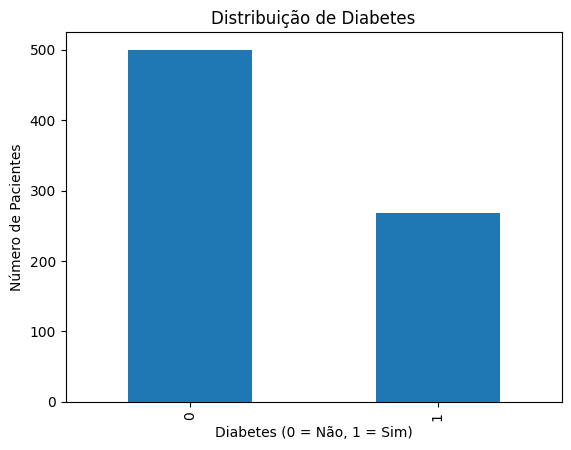

In [18]:
# Distribuição das classes
df['Outcome'].value_counts().plot(kind='bar', title='Distribuição de Diabetes')
plt.xlabel('Diabetes (0 = Não, 1 = Sim)')
plt.ylabel('Número de Pacientes')
plt.show()

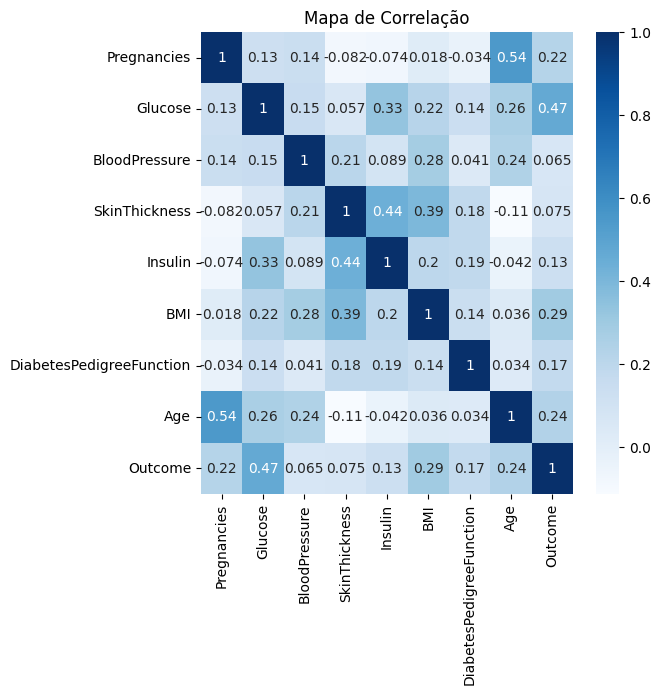

In [21]:
# Correlação entre variáveis
plt.figure(figsize=(6, 6))
sns.heatmap(df.corr(), annot=True, cmap="Blues")
plt.title("Mapa de Correlação")
plt.show()

## Pré-processamento:

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Verificar valores 0 onde não deveriam existir
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols:
    df[col] = df[col].replace(0, df[col].median())

X = df.drop("Outcome", axis=1)
y = df["Outcome"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Treinamento dos modelos e avaliação:

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Modelos
log_model = LogisticRegression()
rf_model = RandomForestClassifier()

log_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Avaliação
pred_log = log_model.predict(X_test)
pred_rf = rf_model.predict(X_test)

acc_log = accuracy_score(y_test, pred_log)
acc_rf = accuracy_score(y_test, pred_rf)

print("Logistic Regression Acurácia:", round(acc_log, 2))
print("Random Forest Acurácia:", round(acc_rf, 2))

Logistic Regression Acurácia: 0.77
Random Forest Acurácia: 0.73


## Avaliação com 30 execuções (validação cruzada)

In [26]:
from sklearn.model_selection import StratifiedKFold
import numpy as np

skf = StratifiedKFold(n_splits=30, shuffle=True, random_state=42)

log_accs = []
rf_accs = []

for train_index, test_index in skf.split(X_scaled, y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Logistic Regression
    log_model = LogisticRegression()
    log_model.fit(X_train, y_train)
    log_accs.append(accuracy_score(y_test, log_model.predict(X_test)))

    # Random Forest
    rf_model = RandomForestClassifier()
    rf_model.fit(X_train, y_train)
    rf_accs.append(accuracy_score(y_test, rf_model.predict(X_test)))

print(f"Logistic Regression - Média: {np.mean(log_accs):.2f}, Desvio Padrão: {np.std(log_accs):.2f}")
print(f"Random Forest - Média: {np.mean(rf_accs):.2f}, Desvio Padrão: {np.std(rf_accs):.2f}")

Logistic Regression - Média: 0.77, Desvio Padrão: 0.07
Random Forest - Média: 0.75, Desvio Padrão: 0.08


## Salvar o melhor modelo com pickle

In [27]:
import pickle

# Treine com todo o conjunto agora
final_model = RandomForestClassifier()
final_model.fit(X_scaled, y)

# Salve o modelo e o scaler
with open("modelo_diabetes.pkl", "wb") as f:
    pickle.dump(final_model, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

## Criar uma interface com Gradio

In [29]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 106.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.9 MB/s eta 0:00:00


In [50]:
import gradio as gr

# Função de predição
def prever_diabetes(Pregnancies, Glucose, BloodPressure, SkinThickness,
                    Insulin, BMI, DiabetesPedigreeFunction, Age):

    with open("modelo_diabetes.pkl", "rb") as f:
        model = pickle.load(f)
    with open("scaler.pkl", "rb") as f:
        scaler = pickle.load(f)

    input_data = [[Pregnancies, Glucose, BloodPressure, SkinThickness,
                   Insulin, BMI, DiabetesPedigreeFunction, Age]]

    input_scaled = scaler.transform(input_data)
    pred = model.predict(input_scaled)

    return "Diabético" if pred[0] == 1 else "Não Diabético"

# Interface
inputs = [
    gr.Number(label="Número de Gestações", minimum=0),
    gr.Number(label="Glicose", minimum=0),
    gr.Number(label="Pressão Arterial", minimum=0),
    gr.Number(label="IMC", minimum=0),
    gr.Number(label="Idade", minimum=0),
]

interface = gr.Interface(
    fn=prever_diabetes,
    inputs=inputs,
    outputs=gr.Textbox(label="Resultado da Predição"),
    title="Predição de Diabetes - Modelo de IA",
    description="Insira os dados do paciente para prever o risco de diabetes."
)

interface.launch()

/usr/local/lib/python3.11/dist-packages/gradio/utils.py:1028: UserWarning: Expected 8 arguments for function <function prever_diabetes at 0x7e09bb83bec0>, received 5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gradio/utils.py:1032: UserWarning: Expected at least 8 arguments for function <function prever_diabetes at 0x7e09bb83bec0>, received 5.
  warnings.warn(


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://b9e270510e7aff2719.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
